<a href="https://colab.research.google.com/github/ncavasin/bdmasivas/blob/master/trigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Universidad Nacional de Lujan - Bases de Datos Masivas (11088) - Cavasin Nicolas #143501
# TP05-02 - Clustering

### Ejercicio 4:
**K-means**. Se provee un dataset sobre las características internas del núcleo de tres clases de trigo diferentes. Cargue el dataset en una de las herramientas de minería de datos provistas y resuelva:

a. Utilice el algoritmo k-medias variando la cantidad de centroides a efectos de agrupar los datos de la manera más eficiente.

b. ¿Cuál es la cantidad de grupos que permite un mejor agrupamiento de los datos? ¿Mediante cual métrica puede verificar esto?

c. ¿Cuáles son las características más distintivas de cada uno de los cluters resultantes?

In [ ]:
!rm trigo.csv
!wget https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0502/trigo.csv

rm: cannot remove 'trigo.csv': No such file or directory
--2020-11-21 17:35:44--  https://raw.githubusercontent.com/bdm-unlu/2020/master/TPs/TP05/TP0502/trigo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9369 (9.1K) [text/plain]
Saving to: ‘trigo.csv’

trigo.csv           100%[===================>]   9.15K  --.-KB/s    in 0s      

2020-11-21 17:35:45 (70.7 MB/s) - ‘trigo.csv’ saved [9369/9369]



In [ ]:
import pandas as pd

trigo = pd.read_csv('trigo.csv', delimiter=';')

print(f'Cantidad de tuplas: {trigo.shape[0]}.')
print(f'Cantidad de columnas: {trigo.shape[1]}.')
print(f'Cantidad de NaN\'s: {trigo.isnull().sum().sum()}.\n')
print(f'Tipos de dato en cada columna: \n{trigo.dtypes}')
trigo.head()

Cantidad de tuplas: 210.
Cantidad de columnas: 8.
Cantidad de NaN's: 0.

Tipos de dato en cada columna: 
area               object
perimetro          object
compact            object
long_kernel        object
ancho_kernel       object
coef_asimetrima    object
long_ranura        object
tipo                int64
dtype: object


,area,perimetro,compact,long_kernel,ancho_kernel,coef_asimetrima,long_ranura,tipo
0,"15,26","14,84","0,871","5,763","3,312","2,221","5,22",1
1,"14,88","14,57","0,8811","5,554","3,333","1,018","4,956",1
2,"14,29","14,09","0,905","5,291","3,337","2,699","4,825",1
3,"13,84","13,94","0,8955","5,324","3,379","2,259","4,805",1
4,"16,14","14,99","0,9034","5,658","3,562","1,355","5,175",1


Se puede observar lo siguiente:

1. El dataset no posee ``NaN``'s.

2. Los valores que son strings (*objects*) deben ser convertidos a numericos:
  - Primero reemplazando las ``,`` (comas) por ``.``(puntos).
  - Luego sí, convirtiendo a *float64* utilizando la librería numpy.

3. Posteriormente deben ser escalados para poder aplicar K-Means, ya que se basa en distancias y cada columna tiene diferentes unidades acordes al tipo de dato que representan.

In [132]:
import numpy as np

# Clono el dataset
trigo_numerizado = trigo.copy()

# Convierto todos los strings a numericos reemplazando la ',' por un '.'
# y luego los paso a float64 con numpy
for col in trigo.columns:
    if col != 'tipo':
        trigo_numerizado[col] = pd.to_numeric(trigo[col].str.replace(',','.'))

# Me guardo los nombres de las columnas
column_names = trigo_numerizado.columns

# Muestro como quedo
trigo_numerizado.head()

Index(['area', 'perimetro', 'compact', 'long_kernel', 'ancho_kernel',
       'coef_asimetrima', 'long_ranura', 'tipo'],
      dtype='object')


,area,perimetro,compact,long_kernel,ancho_kernel,coef_asimetrima,long_ranura,tipo
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
# Ahora procedo con el escalado de valores
from sklearn.preprocessing import scale

# Escalo
trigo_scaled = scale(trigo_numerizado)

# Muestro resultado
print(f'Valores escalados:\n{trigo_scaled}')

Valores escalados:
[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ... -9.86151745e-01
  -3.83577423e-01 -1.22474487e+00]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ... -1.78816620e+00
  -9.22013487e-01 -1.22474487e+00]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ... -6.67479334e-01
  -1.18919199e+00 -1.22474487e+00]
 ...
 [-5.67570840e-01 -6.90247348e-01  7.33948301e-01 ...  3.07658816e+00
  -7.18060432e-01  1.22474487e+00]
 [-1.03608992e+00 -1.03564515e+00 -8.01701104e-01 ... -6.81351965e-02
  -7.42534799e-01  1.22474487e+00]
 [-8.77620233e-01 -9.35863561e-01 -1.10234659e-01 ...  1.29122264e+00
  -7.03783718e-01  1.22474487e+00]]


In [124]:
# Importo para clusterizar
from sklearn.cluster import KMeans

# Importo para graficar
import matplotlib.pyplot as plt

# Instancio el algoritmo con 3 centroides iniciales
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, random_state=0
)

# Ejecuto el algoritmo
trigo_pred = km.fit_predict(trigo_scaled)

print(f'Agrupamiento resultante:\n{trigo_pred}')

Agrupamiento resultante:
[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


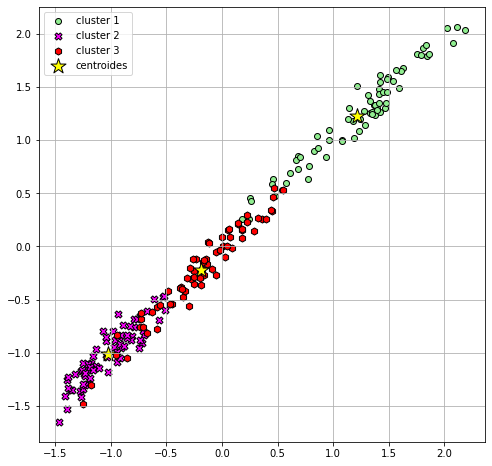

In [128]:
# Importo para graficar
import matplotlib.pyplot as plt

# Creo el grafico
plt.figure(figsize=(8,8))

# Scatter del primer cluster
plt.scatter(
    trigo_scaled[trigo_pred == 0, 0], 
    trigo_scaled[trigo_pred == 0, 1],
    c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 1'
)

# Scatter del segundo cluster
plt.scatter(
    trigo_scaled[trigo_pred == 1, 0], 
    trigo_scaled[trigo_pred == 1, 1],
    s=50, c='magenta',
    marker='X', edgecolor='black',
    label='cluster 2'
)

# Scatter del tercer cluster
plt.scatter(
    trigo_scaled[trigo_pred == 2, 0], 
    trigo_scaled[trigo_pred == 2, 1],
    s=50, c='red',
    marker='h', edgecolor='black',
    label='cluster 3'
)

# Scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='yellow', edgecolor='black',
    label='centroides'
)

# Inserto leyenda
plt.legend(scatterpoints=1)

# Agrego el grid 
plt.grid()

# Lo muestro
plt.show()

Se aplicó **K-Means** utilizando 3 clusters y como resultado se observa una agrupación de datos bastante correcta. 

En el caso de que haya superposiciones de puntos pertenecientes a diferentes clusters, es importante recordar que se puede deber a:
- Mala selección de clusters.
- Se están graficando solo dos variables de un dataset multidimensional, por lo tanto puede que una variable clave (que determina a cuál cluster pertenece un punto) no haya sido graficada.

De todas maneras, para determinar la cantidad de clusters que mejor agrupa los datos, se pueden aplicar dos técnicas:
- *Método de Elbow*.
- *Coeficiente silueta*.

A continuación se aplicará el *método Elbow*:

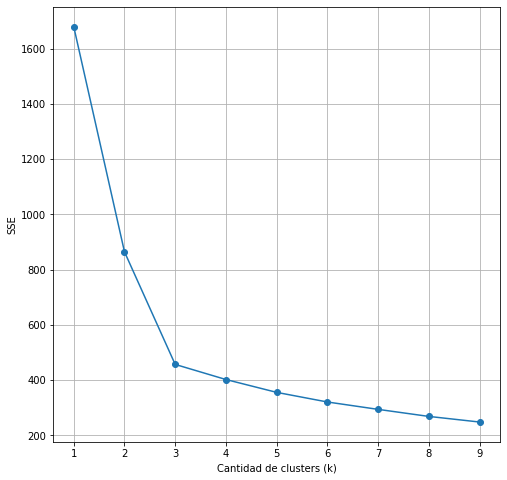

In [ ]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.

# Creo la lista de errores
# sse = Sum of Squared Error
sse = []

# Creo la lista de modelos con 10 clusters (0 a 9 clusters)
lista_modelos = list(range(1, 10))

# Por cada version de clusters de K-means
for num_clusters in lista_modelos:
    # Instancio la version con num_clusters cantidad de clusters
    num_clusters = KMeans(n_clusters=num_clusters)
    # La entreno
    num_clusters.fit(trigo_scaled)
    # Obtengo su error
    sse.append(num_clusters.inertia_)

# Grafico el SSE por cada modelo
plt.figure(figsize=(8, 8))

plt.plot(lista_modelos, sse, '-o')
plt.grid()
plt.xlabel(r'Cantidad de clusters (k)')
plt.ylabel('SSE');



El *método Elbow* nos confirma que la cantidad ideal de clusters es 3 y que la superposición de puntos de diferentes clusters se debe a *la maldición de la dimensionalidad* explicada anteriormente.

In [191]:
# Calculo la moda sobre la columna 'tipo' de los puntos que pertenecen al cluster 3
moda_c1 = pd.DataFrame.mode(trigo[trigo_pred==0], dropna=True)
print(f"Moda cluster 1: {moda_c1.loc[0, 'tipo']}")

# Calculo la moda sobre la columna 'tipo' de los puntos que pertenecen al cluster 3
moda_c2 = pd.DataFrame.mode(trigo[trigo_pred==1], dropna=True)
print(f"Moda cluster 2: {moda_c2.loc[0, 'tipo']}")

# Calculo la moda sobre la columna 'tipo' de los puntos que pertenecen al cluster 3
moda_c3 = pd.DataFrame.mode(trigo[trigo_pred==2], dropna=True)
print(f"Moda cluster 3: {moda_c3.loc[0, 'tipo']}")


Moda cluster 1: 2.0
Moda cluster 2: 3.0
Moda cluster 3: 1.0


***Observaciones:***

En el gráfico se graficaron las variables '*área*' y '*perímetro*' del dataset y con cada color y forma se indicó a cuál cluster pertenecía cada tupla del dataframe. 

Sin embargo, y como se explicó anteriormente, debido a la *maldición de la dimensionalidad* en el scatterplot se ven puntos de diferentes clusters que se superponen o están muy cerca entre sí.

Para finalizar, se calculó la moda de cada cluster y se identificó el tipo de trigo que es más común encontrar en cada uno de ellos.

## Conclusiones:
1. A simple vista, y sin importar a qué cluster pertenece cada punto, se puede decir que hay una relación de *dependencia lineal* entre las variables graficadas (y que está matemáticamente respaldada también).

2. El cluster #3 representa a los tipos de trigo con mayor área y perímetro de todo el dataset, los cuales pertenecen al trigo de **tipo 1**.

3. El cluster #2 posee en su mayoría trigo **tipo 3**. Este tipo de trigo posee un *área* y un *perímetro* con valores promedio respecto a los otros dos presentes en el dataset, pues se ubica en el centro del gráfico.

4. El cluster #1 posee una moda de trigo de **tipo 2**, cuyos valores de *área* y *perímetro* son los de menor tamaño de todo el dataset.